## Grouping

In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv('data/rental_residence.csv', sep=";")

In [3]:
dataset.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Aggregate Type
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento
5,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,21.43,Apartamento
6,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,16.67,Apartamento
7,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,50.00,Apartamento
8,Quitinete,Copacabana,1,0,0,27,1800.0,501.0,0.0,66.67,Apartamento
9,Apartamento,Copacabana,4,3,1,243,13000.0,2000.0,803.0,53.50,Apartamento


In [6]:
round(dataset['Valor'].mean(),2)

4753.97

In [7]:
neighborhood = ['Barra da Tijuca', 'Copacabana', 'Ipanema', 'Leblon', 'Botafogo', 'Flamengo', 'Tijuca']

In [8]:
select = dataset['Bairro'].isin(neighborhood)

In [9]:
dataset[select]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Aggregate Type
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
7,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,50.00,Apartamento
8,Quitinete,Copacabana,1,0,0,27,1800.0,501.0,0.0,66.67,Apartamento
9,Apartamento,Copacabana,4,3,1,243,13000.0,2000.0,803.0,53.50,Apartamento
11,Apartamento,Barra da Tijuca,2,1,1,67,1700.0,589.0,147.0,25.37,Apartamento
...,...,...,...,...,...,...,...,...,...,...,...
20571,Quitinete,Copacabana,1,0,0,22,1500.0,286.0,200.0,68.18,Apartamento
20572,Apartamento,Leblon,3,0,1,80,3000.0,1010.0,249.0,37.50,Apartamento
20573,Apartamento,Ipanema,3,1,2,150,15000.0,1400.0,600.0,100.00,Apartamento
20574,Apartamento,Tijuca,1,0,0,28,1000.0,360.0,25.0,35.71,Apartamento


In [10]:
dataset = dataset[select]

In [11]:
neighborhood_group = dataset.groupby('Bairro')

In [13]:
#DataFrameGroupBy
type(neighborhood_group)

pandas.core.groupby.generic.DataFrameGroupBy

In [16]:
#Dictionaries
neighborhood_group.groups

{'Barra da Tijuca': Int64Index([   11,    17,    26,    28,    31,    38,    54,    55,    58,
                62,
             ...
             20515, 20519, 20520, 20528, 20530, 20533, 20557, 20567, 20568,
             20569],
            dtype='int64', length=3367),
 'Botafogo': Int64Index([   19,    43,    80,    81,   104,   112,   120,   127,   186,
               190,
             ...
             20252, 20267, 20278, 20306, 20423, 20430, 20436, 20480, 20509,
             20548],
            dtype='int64', length=859),
 'Copacabana': Int64Index([    0,     7,     8,     9,    20,    21,    24,    27,    79,
                84,
             ...
             20474, 20478, 20499, 20506, 20539, 20541, 20552, 20565, 20566,
             20571],
            dtype='int64', length=2640),
 'Flamengo': Int64Index([   72,   131,   206,   266,   300,   324,   333,   338,   346,
               369,
             ...
             20304, 20335, 20356, 20402, 20450, 20471, 20491, 20494, 20503,
  

In [30]:
for neighbor, data in neighborhood_group:
    print('{} -> {}'.format(neighbor, data['Valor'].mean()))

Barra da Tijuca -> 5776.047223047223
Botafogo -> 8831.33410942957
Copacabana -> 4125.543181818181
Flamengo -> 4112.56381486676
Ipanema -> 9356.94097616345
Leblon -> 8558.508828250402
Tijuca -> 2037.8175115207373


In [31]:
#Easy way
neighborhood_group['Valor'].mean()

Bairro
Barra da Tijuca    5776.047223
Botafogo           8831.334109
Copacabana         4125.543182
Flamengo           4112.563815
Ipanema            9356.940976
Leblon             8558.508828
Tijuca             2037.817512
Name: Valor, dtype: float64

In [32]:
 #more than one
neighborhood_group[['Valor', 'Condominio']].mean().round(2)    

,Valor,Condominio
Bairro,,
Barra da Tijuca,5776.05,3899.19
Botafogo,8831.33,990.11
Copacabana,4125.54,1150.27
Flamengo,4112.56,1103.70
Ipanema,9356.94,2246.42
Leblon,8558.51,2099.71
Tijuca,2037.82,719.72


In [33]:
neighborhood_group[['Valor','Condominio']].describe().round(2)

Valor                                                       \
                  count     mean        std     min     25%     50%      75%   
Bairro                                                                         
Barra da Tijuca  3367.0  5776.05   11736.06   800.0  2400.0  3600.0   6990.0   
Botafogo          859.0  8831.33  153437.38   700.0  2200.0  3000.0   4315.0   
Copacabana       2640.0  4125.54    3613.13   100.0  2000.0  3000.0   4800.0   
Flamengo          713.0  4112.56    3841.73   800.0  1900.0  2900.0   5000.0   
Ipanema          1762.0  9356.94    8223.01  1200.0  4500.0  7000.0  11000.0   
Leblon           1246.0  8558.51    6666.90   100.0  4500.0  7000.0  10000.0   
Tijuca           1085.0  2037.82    1671.27   750.0  1500.0  1800.0   2300.0   

                           Condominio                                    \
                       max      count     mean        std  min      25%   
Bairro                                                                    
Barra da Tijuca   600000.0     3367.0  3899.19  112920.57  0.0  1113.00   
Botafogo         4500000.0      859.0   990.11     565.23  0.0   600.00   
Copacabana         35000.0     2640.0  1150.27     791.07  0.0   600.00   
Flamengo           35000.0      713.0  1103.70     862.36  0.0   530.00   
Ipanema            90000.0     1762.0  2246.42    1878.49  0.0  1175.00   
Leblon            100000.0     1246.0  2099.71    1440.34  0.0  1120.25   
Tijuca             45000.0     1085.0   719.72     380.62  0.0   510.00   

                                            
                    50%     75%        max  
Bairro                                      
Barra da Tijuca  1550.0  2300.0  6552570.0  
Botafogo          920.0  1290.0     4800.0  
Copacabana        935.5  1452.5    10055.0  
Flamengo          800.0  1430.0     5314.0  
Ipanema          1870.5  2800.0    35579.0  
Leblon           1750.0  2710.0    23511.0  
Tijuca            680.0   871.0     7409.0

In [34]:
neighborhood_group['Valor'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Bairro,,,,,,,,
Barra da Tijuca,3367.0,5776.05,11736.06,800.0,2400.0,3600.0,6990.0,600000.0
Botafogo,859.0,8831.33,153437.38,700.0,2200.0,3000.0,4315.0,4500000.0
Copacabana,2640.0,4125.54,3613.13,100.0,2000.0,3000.0,4800.0,35000.0
Flamengo,713.0,4112.56,3841.73,800.0,1900.0,2900.0,5000.0,35000.0
Ipanema,1762.0,9356.94,8223.01,1200.0,4500.0,7000.0,11000.0,90000.0
Leblon,1246.0,8558.51,6666.90,100.0,4500.0,7000.0,10000.0,100000.0
Tijuca,1085.0,2037.82,1671.27,750.0,1500.0,1800.0,2300.0,45000.0


In [35]:
#only the stats that we want
neighborhood_group['Valor'].aggregate(['min','max']).rename(columns = {'min':'Minimum', 'max':'Maximum'})

,Minimum,Maximum
Bairro,,
Barra da Tijuca,800.0,600000.0
Botafogo,700.0,4500000.0
Copacabana,100.0,35000.0
Flamengo,800.0,35000.0
Ipanema,1200.0,90000.0
Leblon,100.0,100000.0
Tijuca,750.0,45000.0


In [37]:
%matplotlib inline
import matplotlib.pyplot as plt

In [43]:
plt.rc('figure', figsize = (10,5))

Text(0.5, 1.0, 'Average Value')

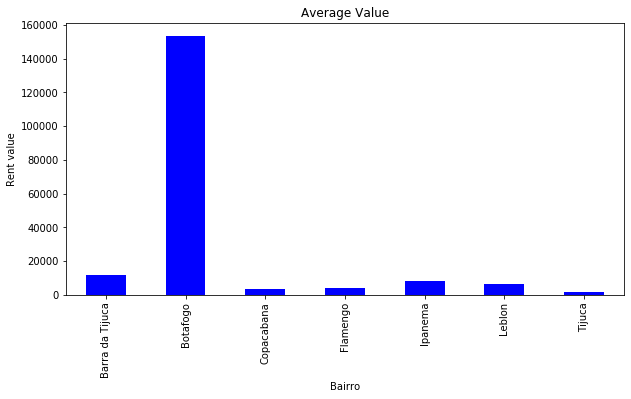

In [47]:
fig = neighborhood_group['Valor'].std().plot.bar(color='blue') 
fig.set_ylabel('Rent value')
fig.set_title('Average Value')